In [1]:
import pandas as pd # import pandas
# read in the data
df = pd.read_csv('all_dates.csv')[['Date','Minimum Temperature','Mean Temperature', 'Maximum Temperature']]
# create list of months
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

In [2]:
# function to return the year, month and day separately
def get_year_month_and_day(date):
    tokens = date.split('-')
    return tokens[0], tokens[1], tokens[2]

In [3]:
df['Year'], df['Month'], df['Day'] = zip(*df['Date'].map(get_year_month_and_day)) # split date in year, month and day
df = df.drop(columns = ['Date']) # drop date column
# convert all columns to numeric
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [4]:
# get range of years
min_year = df['Year'].min()
max_year = df['Year'].max()
year_range = list(range(min_year,max_year+1))

In [5]:
# initialize final dataframe
summary_df = pd.DataFrame(columns=['Year','Lowest Min','Month with Lowest Min',
                                  'Lowest Mean','Month with Lowest Mean',
                                  'Lowest Max','Month with Lowest Max'])
final_df = pd.DataFrame(columns=['Year','Month','Minimum Temperature','Mean Temperature','Maximum Temperature'])
# for year in year range
for year in year_range:
    yearly_df = df[df['Year'] == year] # get dataframe for this year only
    # for each month
    for month in range(1,13):
        monthly_df = yearly_df[yearly_df['Month'] == month] # get dataframe for this month only
        min_temp = monthly_df['Minimum Temperature'].min() # calculate the minimum temp in the month
        mean_temp = monthly_df['Mean Temperature'].mean() # calculate the mean temp in the month
        max_temp = monthly_df['Maximum Temperature'].max() # calculate the maximum temp in the month
        # add data to final dataframe
        final_df.loc[len(final_df.index)] = [year, month, min_temp, mean_temp, max_temp]
    yearly_df2 = final_df[final_df['Year'] == year] # get dataframe for this year only
    # calculate the lowest min, mean and max and the months they occured
    min_monthly_min_idx = yearly_df2['Minimum Temperature'].idxmin()
    month_with_lowest_min = months[int(yearly_df2['Month'][min_monthly_min_idx]) - 1]
    lowest_min = yearly_df2['Minimum Temperature'][min_monthly_min_idx]
    min_monthly_mean_idx = yearly_df2['Mean Temperature'].idxmin()
    month_with_lowest_mean = months[int(yearly_df2['Month'][min_monthly_mean_idx]) - 1]
    lowest_mean = yearly_df2['Mean Temperature'][min_monthly_mean_idx]
    min_monthly_max_idx = yearly_df2['Maximum Temperature'].idxmin()
    month_with_lowest_max = months[int(yearly_df2['Month'][min_monthly_max_idx]) - 1]
    lowest_max = yearly_df2['Maximum Temperature'][min_monthly_max_idx]
    # add data to summary dataframe
    summary_df.loc[len(summary_df.index)] = [year,lowest_min,month_with_lowest_min,lowest_mean,
                                             month_with_lowest_mean,lowest_max,month_with_lowest_max]
    # print results
    print('for the year ' + str(year) + ':')
    print('the month with the lowest low temperature was: ' + month_with_lowest_min)
    print('the month with the lowest mean temperature was: ' + month_with_lowest_mean)
    print('the month with the lowest max temperature was: ' + month_with_lowest_max)
    print('')

for the year 2017:
the month with the lowest low temperature was: January
the month with the lowest mean temperature was: January
the month with the lowest max temperature was: January

for the year 2018:
the month with the lowest low temperature was: January
the month with the lowest mean temperature was: January
the month with the lowest max temperature was: December

for the year 2019:
the month with the lowest low temperature was: March
the month with the lowest mean temperature was: February
the month with the lowest max temperature was: January

for the year 2020:
the month with the lowest low temperature was: February
the month with the lowest mean temperature was: January
the month with the lowest max temperature was: January

for the year 2021:
the month with the lowest low temperature was: February
the month with the lowest mean temperature was: February
the month with the lowest max temperature was: January



In [6]:
# output results
final_df.to_csv('monthly.csv', index=False)
summary_df.to_csv('summary.csv', index=False)

In [7]:
# set x, y and label values
x = summary_df['Year'].tolist()
y_min = summary_df['Lowest Min'].tolist()
y_min_labels = summary_df['Month with Lowest Min'].tolist()
y_mean = summary_df['Lowest Mean'].tolist()
y_mean_labels = summary_df['Month with Lowest Mean'].tolist()
y_max = summary_df['Lowest Max'].tolist()
y_max_labels = summary_df['Month with Lowest Max'].tolist()

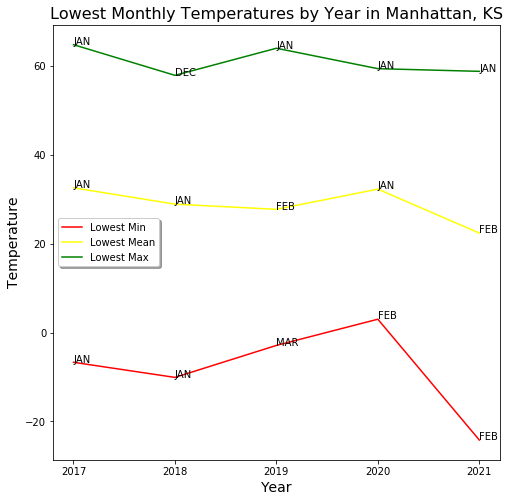

In [9]:
import matplotlib.pyplot as plt # import pyplot
plt.rcParams['figure.figsize'] = (8, 8) # set plot size
fig, ax = plt.subplots()
plt.plot(x, y_min, label='Lowest Min', color='red') # plot mins
# add labels
i = 0
for xy in zip(x, y_min):
    ax.annotate(y_min_labels[i].upper()[0:3], xy=xy, textcoords='data')
    i = i + 1
plt.plot(x, y_mean, label='Lowest Mean', color='yellow') # plot means
# add labels
i = 0
for xy in zip(x, y_mean):
    ax.annotate(y_mean_labels[i].upper()[0:3], xy=xy, textcoords='data')
    i = i + 1
plt.plot(x, y_max, label='Lowest Max', color='green') # plot maxes
# add labels
i = 0
for xy in zip(x, y_max):
    ax.annotate(y_max_labels[i].upper()[0:3], xy=xy, textcoords='data')
    i = i + 1
# set title, x-axis label, y-axis label and legend and show plot
plt.title('Lowest Monthly Temperatures by Year in Manhattan, KS', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
legend = ax.legend(loc='center left', shadow=True, fontsize='medium')
plt.xticks(year_range)
plt.show()